In [1]:
import pandas as pd
data  =  pd.read_csv('Iemocap_clean_data.csv')
data.head()

,Unnamed: 0,session,method,gender,emotion,n_annotators,agreement,path,transcript,duration
0,0,1,script,F,neu,3,3,Session1/sentences/wav/Ses01F_script02_1/Ses01...,Fine.\n,2.070000
1,1,1,script,F,fru,3,2,Session1/sentences/wav/Ses01F_script02_1/Ses01...,[BREATHING]\n,1.502438
2,2,1,script,F,neu,3,2,Session1/sentences/wav/Ses01F_script02_1/Ses01...,That's not your flashlight.\n,2.180000
3,3,1,script,F,ang,3,2,Session1/sentences/wav/Ses01F_script02_1/Ses01...,You keep saying my flashlight like it's just ...,2.970000
4,4,1,script,F,ang,3,2,Session1/sentences/wav/Ses01F_script02_1/Ses01...,How's that supposed to make me feel?\n,1.819937


In [2]:
import os
os.chdir('/Users/adham/Desktop/EMO_REC/IEMOCAP_full_release/Sessions')

In [3]:
data['path'][0]

'Session1/sentences/wav/Ses01F_script02_1/Ses01F_script02_1_F000.wav'

In [ ]:
import os
import librosa

folder_path = '/Users/adham/Desktop/EMO_REC/IEMOCAP_full_release/Sessions/Session1/sentences/wav/Ses01F_impro01'

for filename in os.listdir(folder_path):
    if filename.endswith(".wav"):  # assuming audio files are in WAV format
        file_path = os.path.join(folder_path, filename)
        y, sr = librosa.load(file_path, sr=None)
        print(f"Sample rate for {filename}: {sr}")


In [9]:
data.head()

,Unnamed: 0,session,method,gender,emotion,n_annotators,agreement,path,transcript,duration
0,0,1,script,F,neu,3,3,Session1/sentences/wav/Ses01F_script02_1/Ses01...,Fine.\n,2.070000
1,1,1,script,F,fru,3,2,Session1/sentences/wav/Ses01F_script02_1/Ses01...,[BREATHING]\n,1.502438
2,2,1,script,F,neu,3,2,Session1/sentences/wav/Ses01F_script02_1/Ses01...,That's not your flashlight.\n,2.180000
3,3,1,script,F,ang,3,2,Session1/sentences/wav/Ses01F_script02_1/Ses01...,You keep saying my flashlight like it's just ...,2.970000
4,4,1,script,F,ang,3,2,Session1/sentences/wav/Ses01F_script02_1/Ses01...,How's that supposed to make me feel?\n,1.819937


In [29]:
import pandas as pd
import numpy as np
data_speech = pd.DataFrame()
data_speech['path'] = data['path']
data_speech['emotion'] = data['emotion']
data_speech['duration'] = data['duration']



In [30]:
len(data_speech)
data_speech.head()


,path,emotion,duration
0,Session1/sentences/wav/Ses01F_script02_1/Ses01...,neu,2.070000
1,Session1/sentences/wav/Ses01F_script02_1/Ses01...,fru,1.502438
2,Session1/sentences/wav/Ses01F_script02_1/Ses01...,neu,2.180000
3,Session1/sentences/wav/Ses01F_script02_1/Ses01...,ang,2.970000
4,Session1/sentences/wav/Ses01F_script02_1/Ses01...,ang,1.819937


In [31]:
import os
import librosa
MFCCs = []
for wav_path in data_speech['path']:
    y, sr = librosa.load(wav_path, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=16000, n_mfcc=13)
    #MFCCs.append(mfcc)
#data_speech['MFCCs'] = MFCCs

In [41]:
data_speech.head()

,path,emotion,duration,MFCCs
0,Session1/sentences/wav/Ses01F_script02_1/Ses01...,neu,2.070000,"[[-416.43948, -379.25708, -392.8295, -416.4000..."
1,Session1/sentences/wav/Ses01F_script02_1/Ses01...,fru,1.502438,"[[-442.04388, -414.33728, -392.21173, -380.245..."
2,Session1/sentences/wav/Ses01F_script02_1/Ses01...,neu,2.180000,"[[-393.97244, -376.89456, -396.14847, -405.087..."
3,Session1/sentences/wav/Ses01F_script02_1/Ses01...,ang,2.970000,"[[-379.47668, -367.20868, -388.83545, -407.315..."
4,Session1/sentences/wav/Ses01F_script02_1/Ses01...,ang,1.819937,"[[-320.4156, -292.12933, -293.4371, -313.04877..."


In [53]:
max_val = data_speech['MFCCs'].apply(np.amax).max()
min_val = data_speech['MFCCs'].apply(np.amin).min()
print("max values = ",max_val,"min value = ", min_val)

max values =  245.52792358398438 min value =  -627.95947265625


-627.95947265625

In [42]:
def normalize(x):
    return (x - np.mean(x)) / np.std(x)
data_speech['MFCCs_Normaliezed'] = data_speech['MFCCs'].apply(normalize)

In [54]:
max_val = data_speech['MFCCs_Normaliezed'].apply(np.amax).max()
min_val = data_speech['MFCCs_Normaliezed'].apply(np.amin).min()
print("max values = ",max_val,"min value = ", min_val)

max values =  4.339141845703125 min value =  -9.103227615356445


,path,emotion,duration,MFCCs,MFCCs_Normaliezed
0,Session1/sentences/wav/Ses01F_script02_1/Ses01...,neu,2.070000,"[[-416.43948, -379.25708, -392.8295, -416.4000...","[[-3.613661, -3.27564, -3.3990254, -3.6133027,..."
1,Session1/sentences/wav/Ses01F_script02_1/Ses01...,fru,1.502438,"[[-442.04388, -414.33728, -392.21173, -380.245...","[[-3.829366, -3.577893, -3.3770754, -3.2684681..."
2,Session1/sentences/wav/Ses01F_script02_1/Ses01...,neu,2.180000,"[[-393.97244, -376.89456, -396.14847, -405.087...","[[-3.526852, -3.3666823, -3.5472605, -3.631096..."
3,Session1/sentences/wav/Ses01F_script02_1/Ses01...,ang,2.970000,"[[-379.47668, -367.20868, -388.83545, -407.315...","[[-4.192859, -4.051012, -4.3010683, -4.5147414..."
4,Session1/sentences/wav/Ses01F_script02_1/Ses01...,ang,1.819937,"[[-320.4156, -292.12933, -293.4371, -313.04877...","[[-3.3755927, -3.060244, -3.0748234, -3.293464..."


Extract MFCC


In [5]:
import os
import librosa

folder_path = '/Users/adham/Desktop/EMO_REC/IEMOCAP_full_release/Sessions/Session1/sentences/wav/Ses01F_impro01'
MFCC_data = {}
for filename in os.listdir(folder_path):
    if filename.endswith(".wav"):  # assuming audio files are in WAV format
        file_path = os.path.join(folder_path, filename)
        y, sr = librosa.load(file_path, sr=16000)  # load audio with sample rate of 16kHz
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # extract 13 MFCCs
        MFCC_data[filename] = mfccs
        #mfccs_file = os.path.splitext(file_path)[0] + ".npy"  # save MFCCs as .npy file
        #np.save(mfccs_file, mfccs)  # save MFCCs as .npy file


{'Ses01F_impro01_M000.wav': array([[-4.07278137e+02, -3.68428131e+02, -3.65115112e+02, ...,
         -4.30504425e+02, -4.23616608e+02, -4.27391327e+02],
        [ 7.10333557e+01,  7.43817596e+01,  7.40681458e+01, ...,
          1.09649200e+02,  1.07987076e+02,  1.09473900e+02],
        [-2.91167688e+00, -7.14795303e+00, -1.47023573e+01, ...,
         -4.30799150e+00,  1.67097902e+00, -2.72219753e+00],
        ...,
        [ 1.21355093e+00, -5.27167797e+00, -6.00202656e+00, ...,
          2.25194120e+00,  8.51490021e-01, -9.37005639e-01],
        [ 6.61997604e+00,  5.27940559e+00,  6.07504940e+00, ...,
          2.33969784e+00,  9.62328672e-01,  2.65813708e-01],
        [ 1.22758985e+00, -8.72660518e-01,  2.14269567e+00, ...,
         -8.07726860e-01, -3.89003277e+00, -5.69563580e+00]], dtype=float32),
 'Ses01F_impro01_F009.wav': array([[-4.58730927e+02, -4.37013306e+02, -4.22140320e+02, ...,
         -3.66063263e+02, -3.76038086e+02, -4.22051514e+02],
        [ 1.25830643e+02,  1.30012

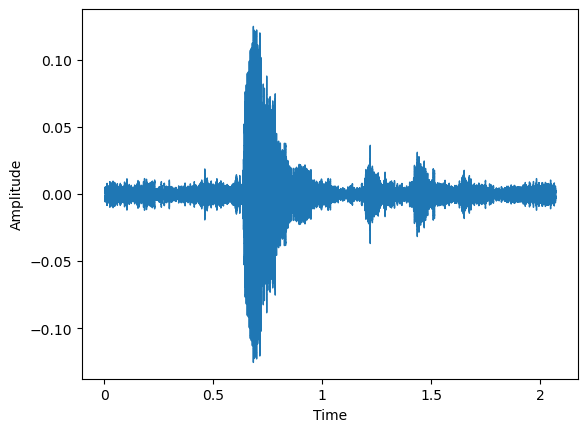

In [59]:
import librosa
import matplotlib.pyplot as plt 
signal, sr = librosa.load(data['path'][0], sr=22050)
librosa.display.waveshow(signal, sr=sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

In [21]:
sr

22050

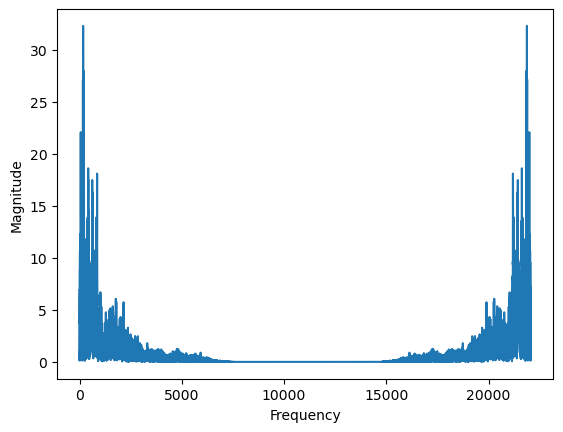

In [22]:
import numpy as np
fft = np.fft.fft(signal)
magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))
plt.plot(frequency, magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

In [28]:
magnitude

array([0.84196663, 0.29359909, 0.28718601, ..., 0.28961627, 0.28718601,
       0.29359909])

In [29]:
frequency

array([0.00000000e+00, 4.83097080e-01, 9.66194159e-01, ...,
       2.20490338e+04, 2.20495169e+04, 2.20500000e+04])

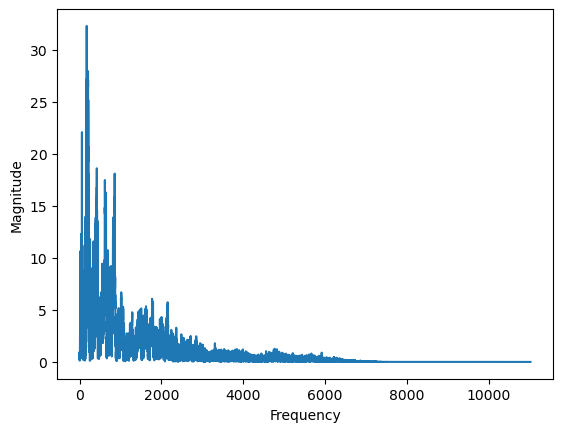

In [26]:
import numpy as np
fft = np.fft.fft(signal)

left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(frequency)/2)]
plt.plot(left_frequency, left_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

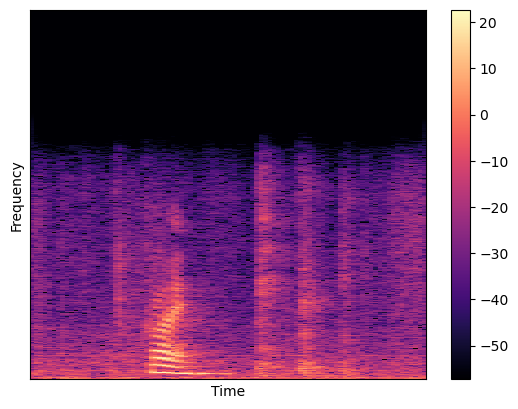

In [42]:
stft = librosa.core.stft(signal, hop_length=512, n_fft=2048)
spectrogram = np.abs(stft)
log_spectrogram = librosa.amplitude_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=512)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()

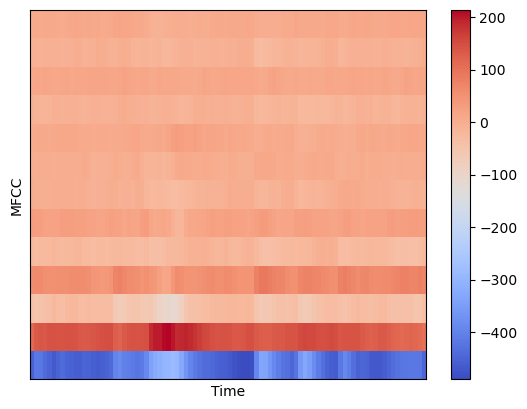

In [64]:
MFCCs = librosa.feature.mfcc(y = signal, n_fft=2048, hop_length=512, n_mfcc=13)
librosa.display.specshow(MFCCs, sr=sr, hop_length=512)
plt.xlabel("Time")
plt.ylabel("MFCC")
plt.colorbar()

In [68]:
len(MFCCs[0])

90

In [57]:
type(signal)

numpy.ndarray

In [15]:
frequency

array([0.00000000e+00, 4.83097080e-01, 9.66194159e-01, ...,
       2.20490338e+04, 2.20495169e+04, 2.20500000e+04])

In [10]:
len(signal)

45644

In [9]:
len(fft)

45644

In [11]:
fft

array([-0.84196663-9.43689571e-16j,  0.29354621-5.57185757e-03j,
        0.28560917+3.00533604e-02j, ...,  0.28841648-2.63347010e-02j,
        0.28560917-3.00533604e-02j,  0.29354621+5.57185757e-03j])

In [11]:
import wave
with wave.open(data['path'][2], 'r') as wav_file:
    print("Sample rate:", wav_file.getframerate())

Sample rate: 16000


In [15]:
data.head()

,Unnamed: 0,session,method,gender,emotion,n_annotators,agreement,path,transcript,duration
0,0,1,script,F,neu,3,3,Session1/sentences/wav/Ses01F_script02_1/Ses01...,Fine.\n,2.070000
1,1,1,script,F,fru,3,2,Session1/sentences/wav/Ses01F_script02_1/Ses01...,[BREATHING]\n,1.502438
2,2,1,script,F,neu,3,2,Session1/sentences/wav/Ses01F_script02_1/Ses01...,That's not your flashlight.\n,2.180000
3,3,1,script,F,ang,3,2,Session1/sentences/wav/Ses01F_script02_1/Ses01...,You keep saying my flashlight like it's just ...,2.970000
4,4,1,script,F,ang,3,2,Session1/sentences/wav/Ses01F_script02_1/Ses01...,How's that supposed to make me feel?\n,1.819937
